In [81]:
# Importing Neccasary Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
import seaborn as sns
sns.set()
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download()
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
# loading Our data :--- 
link = "covid.csv"
df = pd.read_csv(link)

In [3]:
df.iloc[1:4]   # Head of the data 

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False


In [5]:
df.info()  # Checking Our Data Types :--

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [4]:
df.select_dtypes('object').describe()  # Desription of the data 

,user_name,user_location,user_description,user_created,date,text,hashtags,source
count,179108,142337,168822,179108,179108,179108,127774,179031
unique,92276,26920,89200,93708,136611,178683,52640,610
top,GlobalPandemic.NET,India,Breaking News & Critical Information to SURVIV...,2010-07-13 21:58:05,2020-08-06 16:00:00,"The incompetence of this administration, and t...",['COVID19'],Twitter Web App
freq,679,3741,679,679,26,13,37792,56891


In [36]:
df.shape   # 179108 instances , 13 columns 

(179108, 13)

In [6]:
# Finding Unique value in Our data 
print("Unique values among the data :-")
df.apply(lambda x: len(x.unique()))

Unique values among the data :-


user_name            92276
user_location        26921
user_description     89201
user_created         93708
user_followers       27694
user_friends         11022
user_favourites      35259
user_verified            2
date                136611
text                178683
hashtags             52641
source                 611
is_retweet               1
dtype: int64

In [ ]:
## Here we do EDA Part :

In [47]:
# First Username Analysis :-- 
users=df['user_name'].sample(100)

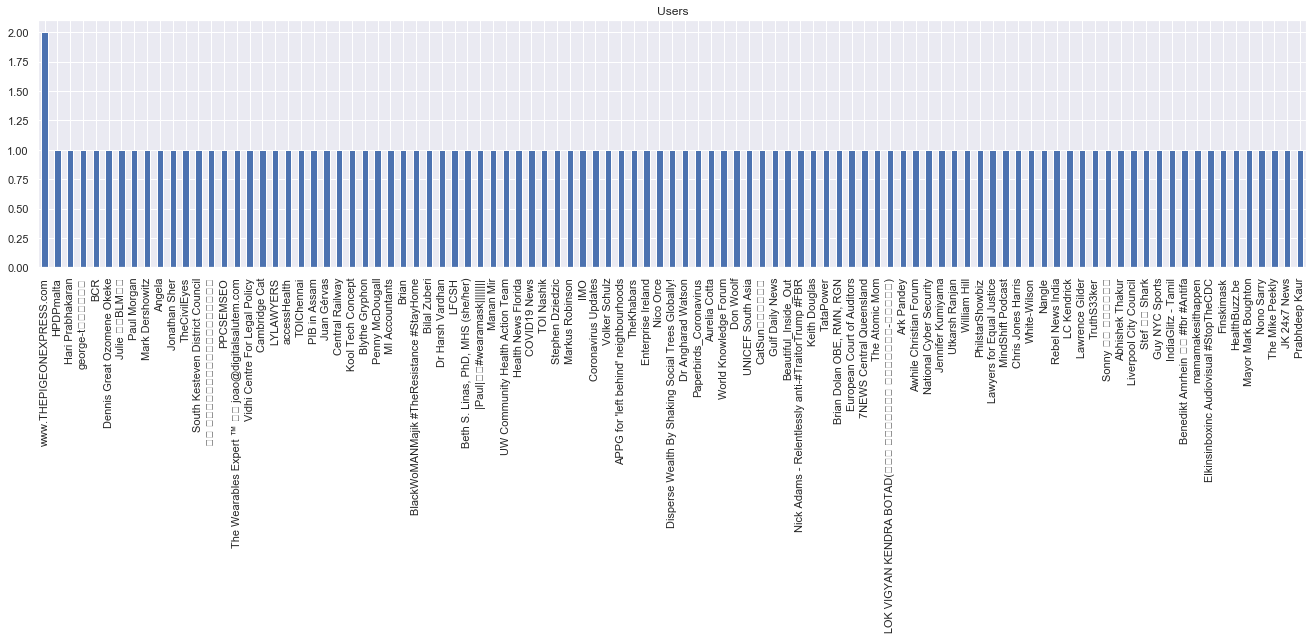

In [48]:
# Independent Categorical : ( Categorical)
plt.figure(1)
plt.subplot(221)
users.value_counts().plot.bar(figsize=(50,10),title = "Users")   
# These Are Sample of Twitter Users

# Below are Some User Names Who Tweets 

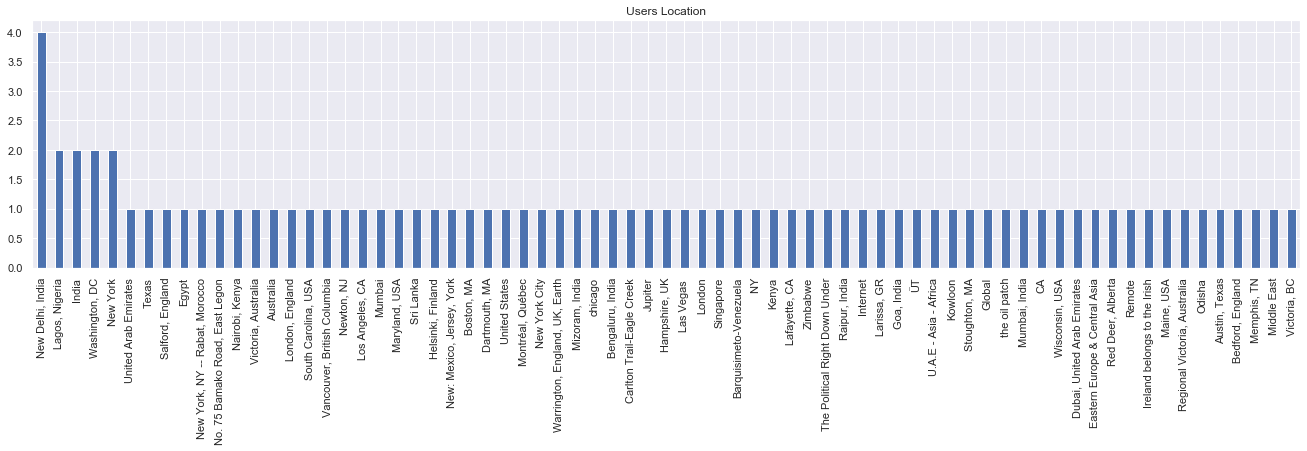

In [49]:
# 2nd Location Wise :
plt.figure(1)
plt.subplot(221)
df['user_location'].sample(100).value_counts().plot.bar(figsize=(50,10),title = "Users Location")   
# These Are Sample of Twitter Users
# As we India, Australia and California People were More Tweets were there!!!!

In [10]:
# Make a Function That Clean Our Data :---
# Clean columns :
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    # Replacing Two or more dots with one
    cleannum = multiw_remove.str.replace(r'\.{2,}', ' ')
    # cleaning numbers
    dataframe = cleannum.str.replace('\d+', '')
    
    return dataframe

In [11]:
# 3RD User Description 
df['user_description']=review_clean(df['user_description'])

In [13]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin it,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY",husband father columnist commentator author of...,2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",christian catholic conservative reagan republi...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,browns indians clevelandproud _ cavs resist,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,official twitter handle of department of infor...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [15]:
df['user_description'].iloc[1:3]  

1    husband father columnist commentator author of...
2    christian catholic conservative reagan republi...
Name: user_description, dtype: object

In [22]:
#Checking is there any Na Values 
df.isna().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

In [24]:
df['user_description']=df['user_description'].fillna('Not Available')

In [19]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [25]:
dtm = cv.fit_transform(df['user_description'])

In [30]:
len(cv.get_feature_names())

55701

In [42]:
import random
for i in range(30):
    random_word_id = random.randint(0,55701)
    print(cv.get_feature_names()[random_word_id])
    # These are User Info Of Different Profiles 

socphd
trenton
mamc
sheepdog
wildcard
mhqanji
seaman
marines
laughable
fosteryouthvoices
siliguritimesnow
extaff
screamingfirehawk
wavers
limaynn
huh
craftistic
recorded
board
realdrgina
hagler
puns
studied
waged
stopgtechnology
fammed
maslen
rti
cigarettes
dominatrix


In [56]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

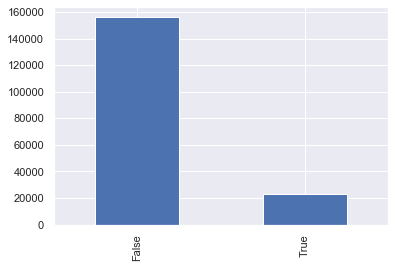

In [65]:
#4 the User Verified OR Not 
df['user_verified'].value_counts().plot.bar()  # These are Profile who verified  True,false Propotion.

In [70]:
# 5th Text and Forward to Sentimental Analysis
df['text']=review_clean(df['text'])

In [78]:
tokenizer = RegexpTokenizer(r'\w+')
df['Words']=df['text'].apply(lambda x: tokenizer.tokenize(x.lower()))

# Lemmatizer
lemmatizer = WordNetLemmatizer()
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text


df['lemmaWords']=df['Words'].apply(lambda x: word_lemmatizer(x))


def rejoin_words(row):
    my_list = row['lemmaWords']
    joined_words = ( " ".join(my_list))
    return joined_words


df['processed'] = df.apply(rejoin_words,axis=1)

In [92]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet', 'Words',
       'lemmaWords', 'processed'],
      dtype='object')

In [93]:
# Dropping Unnessary Columns : --
columns = ['text','Words','lemmaWords']
df.drop(columns,axis=1,inplace = True)

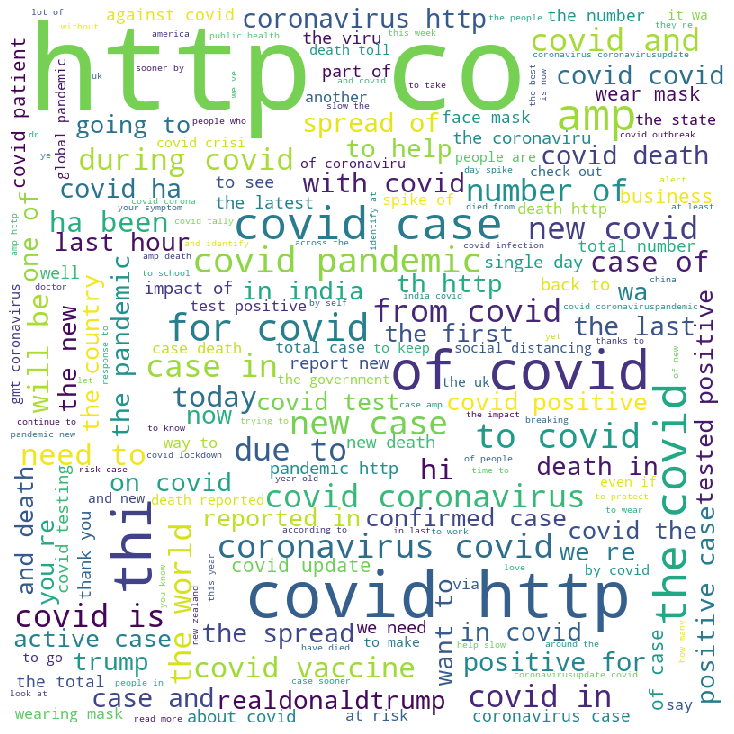

In [137]:
# Make a word cloud with Our Processed Data 
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.processed: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
 # plot the WordCloud image                        
plt.figure(figsize = (20, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


# Below are the Clean data which show Highlighted Comment That Appeared Most 
# These Comment are From All Over the Word 

In [96]:
# Now Importing Library to Analyis Sentiment 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


df['scores'] = df['processed'].apply(lambda processed: sid.polarity_scores(processed))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])



df['comp_score'] = df['compound'].apply(lambda c: '1' if c >=0 else '0')


In [123]:
df['comp_score'].value_counts()  # So 1 is Positive Comment & 0 were Negative Comments


1    123966
0     55142
Name: comp_score, dtype: int64

In [125]:
# 6 :Hastag Analysis
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()

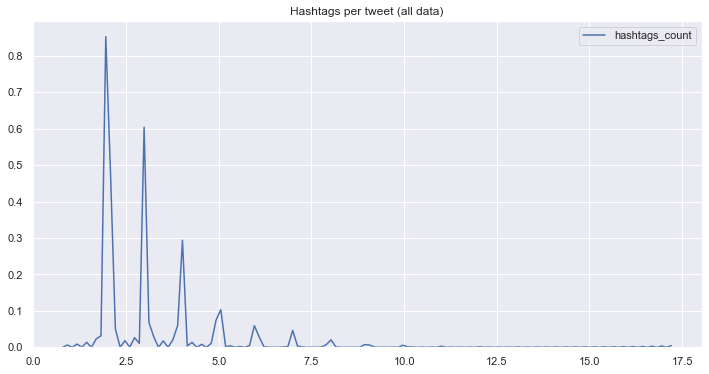

There are totally: 60409


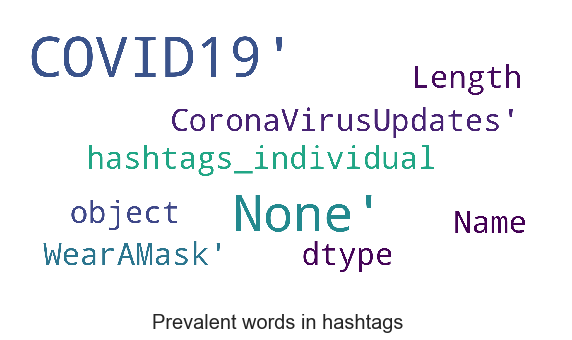

In [130]:
df['hashtags'] = df['hashtags'].replace(np.nan, "['None']", regex=True)
df['hashtags'] = df['hashtags'].apply(lambda x: x.replace('\\N',''))
df['hashtags_count'] = df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', df)





# Making a cloud with that 
df['hashtags_individual'] = df['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(df['hashtags_individual'])))
print(f"There are totally: {len(all_hashtags)}")

# Defined the function first
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()




show_wordcloud(df['hashtags_individual'], title = 'Prevalent words in hashtags')

# Below It show's How Much Hastag Per Tweets
# And there Word Cloud Which Show Most Appeared Word
# !!!!!!!!!!!!!!!!!!!!!!

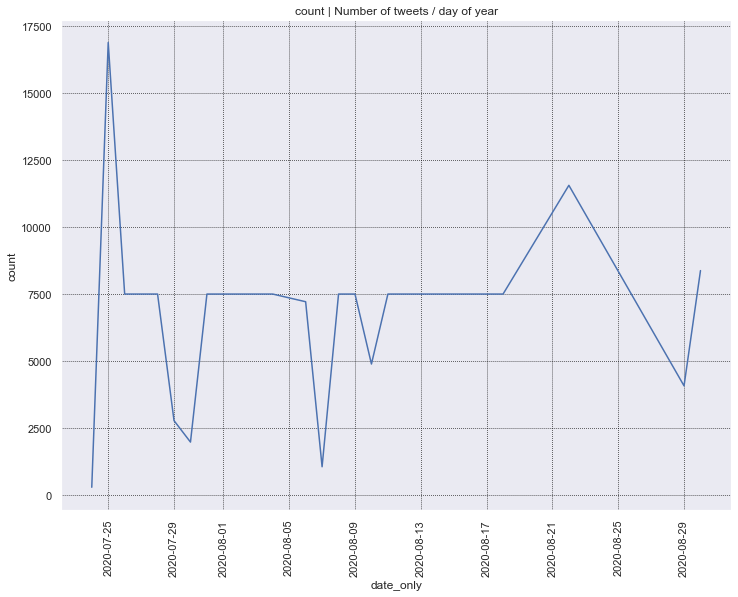

In [136]:
# 7 Date Wise Analysis:  How Much Comments Were Tweet

df['datedt'] = pd.to_datetime(df['date'])

#
df['year'] = df['datedt'].dt.year
df['month'] = df['datedt'].dt.month
df['day'] = df['datedt'].dt.day
df['dayofweek'] = df['datedt'].dt.dayofweek
df['hour'] = df['datedt'].dt.hour
df['minute'] = df['datedt'].dt.minute
df['dayofyear'] = df['datedt'].dt.dayofyear
df['date_only'] = df['datedt'].dt.date



tweets_agg_df = df.groupby(["date_only"])["processed"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]


def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 
    
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)


# Below It was Showing How Many number of Tweets Day of year
# we are seeing the Increasing Rate of Comment 